# Principal Component Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.ticker import PercentFormatter

sns.set_style("whitegrid")

In [2]:
X = pd.read_csv("./data/X.csv", header=None)
X.head()

,0,1,2,3
0,-1.8792,5.9932,-1.6003,0.9285
1,-2.5856,7.5326,-0.5100,1.1351
2,-4.7000,5.2303,-0.2606,0.9775
3,-3.5637,6.3714,0.7119,0.9411
4,-2.5546,5.7744,-1.1941,0.9706


We can use the [PCA()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn-decomposition-pca) class to perform principal component analysis on raw data.

In [3]:
pca = PCA(n_components=X.shape[1])
Y = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_

How much variance in the data is explained by the first two or three principal components? We can visualize the percent variance explained using a Pareto chart.

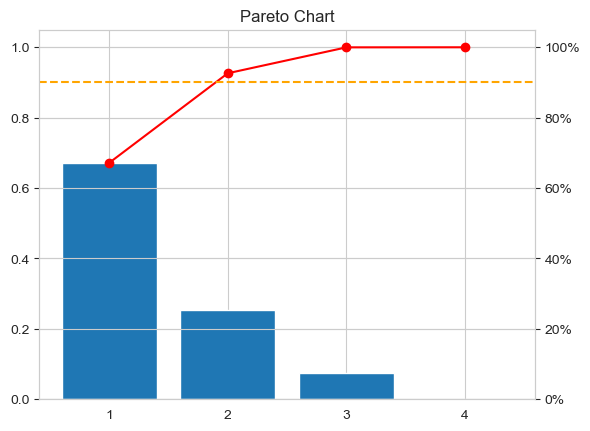

In [4]:
# Set figure and axis
fig, ax = plt.subplots()

# Plot bars (i.e. frequencies)
ax.bar(np.arange(1, len(variance_ratio) + 1), variance_ratio)
ax.set_ylim(0, variance_ratio.sum()*1.05)
ax.set_title("Pareto Chart")
ax.set_xticks(np.arange(1, 5))

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(np.arange(1, len(variance_ratio) + 1), (variance_ratio / variance_ratio.sum() * 100).cumsum(), color="red", marker="o")
ax2.axhline(90, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0, 100*1.05)

plt.show()

From the Pareto chart, you can see that over 90% of the data is explained by the first two principal components.

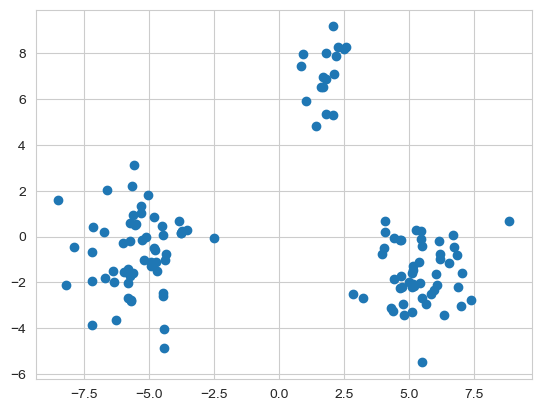

In [5]:
plt.figure()
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()